### 생선 분류 문제

## 생선 데이터

In [1]:
# 도미의 길이와 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
# 빙어의 길이과 무게
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 데이터 시각화

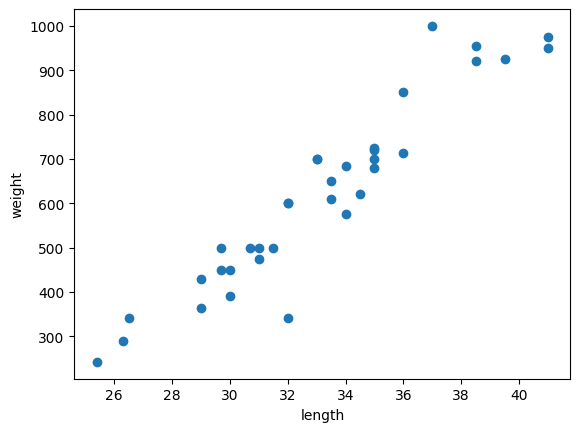

In [3]:
# 도미의 산점도 그려보기
import matplotlib.pyplot as plt

#산점도(scatter plt)를 그리기 위한 함수 plt.scatter(x,y)
plt.scatter(bream_length, bream_weight)

plt.xlabel("length")
plt.ylabel("weight")

plt.show()



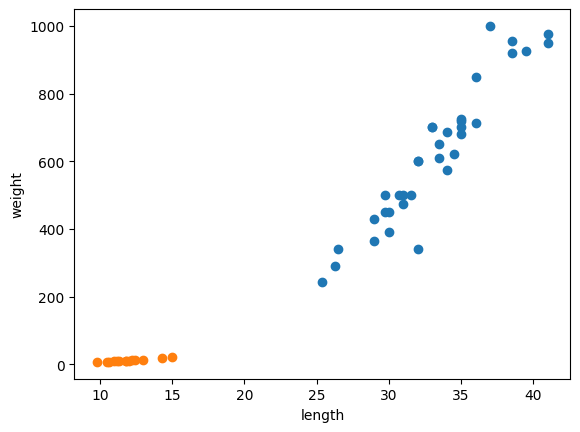

In [4]:
# 도미와 빙어 산점도 동시에 그려보기
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

plt.xlabel("length")
plt.ylabel("weight")

plt.show()

## 머신러닝 모델 만들기

In [5]:
# K-Nearest Neighbors K-최근접 이웃

#### KNN은 학습 과정에서 데이터를 저장만 하고, 예측 시 새로운 데이터와 기존 데이터 간의 거리를 계산하여 가장 가까운 '이웃' 데이터를 기준으로 예측을 수행하는 방식

- K 값: 예측할 때 참고하는 '이웃'의 수입니다. K 값이 작을수록 예측이 개별 데이터에 민감하고, K 값이 클수록 데이터의 전체적인 경향을 반영합니다.
- 거리 측정: 가장 일반적으로 **유클리드 거리(Euclidean Distance)**가 사용됩니다. 두 데이터 포인트 간의 직선 거리를 계산하여 가까운 이웃을 찾습니다.

In [6]:
# 도미(35개)와 빙어(14개) 데이터 합치기
length = bream_length +smelt_length
weight = bream_weight + smelt_weight

#### 리스트 컴프리헨션
- [l, w]는 zip 함수로부터 반환된 두 요소 l과 w를 리스트로 만듭니다. 
- 예를 들어, zip(length, weight)가 (l1, w1)를 반환하면 [l1, w1]와 같은 리스트가 생성됩니다.

In [7]:
# 리스트 컴프리헨션을 이용해서 2차원 데이터 만들기

fish_data =[[l,w] for l,w in zip(length,weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [8]:
# 도미 데이터 1, 빙어 데이터 0
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-neighbors Classifier 클래스

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# KNeighborsClassifier 클래스의 객체 생성
kn = KNeighborsClassifier()

In [11]:
# fit() 메소드를 통해 학습 혹은 훈련 training
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [12]:
# 모델이 얼마나 잘 훈련되었는지 평가 0에서 1 사이의 값을 반환
#1.0으로 100% 정확히 예측
kn.score(fish_data, fish_target)

1.0

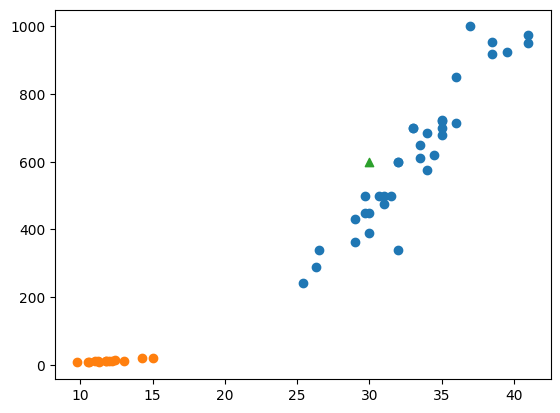

In [13]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.scatter(30, 600, marker='^') # 새로운 데이터
#길이가 30, 무게가 600인 새로운 데이터를 산점도로 추가합니다.



plt.xlabel= ("length")
plt.ylabel = ("weight")

plt.show()

In [14]:
# TODO: 새로운 데이터의 분류값 예측해보기
kn.predict([[30, 600]])


array([1])

- 새로운 데이터가 도미로 잘 예측하는 모습을 보여줌 array[1] => 도미

In [15]:
kn49 = KNeighborsClassifier(n_neighbors=49)

- n_neighbors는 K-최근접 이웃 알고리즘에서 사용할 **이웃의 수(K)**를 지정하는 하이퍼파라미터입니다. 
- 여기서는 49개의 이웃을 사용하여 예측을 수행하겠다는 의미입니다.


In [16]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [17]:
print(35/49)

0.7142857142857143


## 훈련 세트와 테스트세트

In [23]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [24]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [25]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [26]:
# 훈련데이터와 테스트 데이터를 0~34, 35~49로 지정

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [27]:
# 모델 평가
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

## 넘파이를 이용하여 샘플을 섞어보기

In [28]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [29]:
# 배열의 크기 확인하기 shape 속성
print(input_arr.shape)

(49, 2)


In [30]:
# 0부터 48까지의 인덱스를 랜덤하게 섞기 위함
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [31]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [32]:
# 인덱스 배열의 처음 35개를 input_arr과 target_arr에 전달하여 랜덤하게 35개의 샘플을 훈련 세트로 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [33]:
print(input_arr[13], train_input[0])
# 데이터를 확인하고 검증하기 위한 작업

[ 32. 340.] [ 32. 340.]


In [34]:
# 테스트 데이터(나머지 데이터가 테스트 데이터터)
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

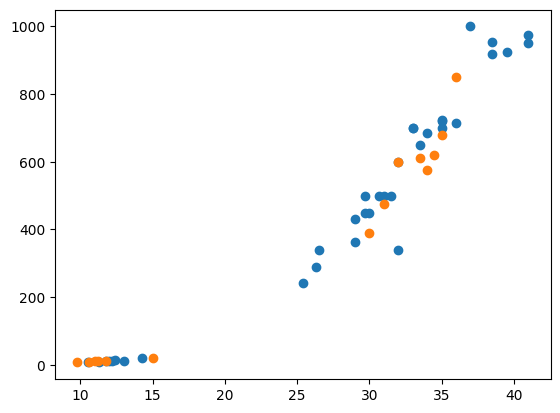

In [35]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1]) # 파랑
plt.scatter(test_input[:, 0], test_input[:, 1]) # 주황
plt.xlabel = ('length')
plt.ylabel= ('weight')
plt.show()

## 머신러닝 모델 만들기 2

In [36]:
# 훈련 데이터 세트와 테스트 데이터 세트로 KNN모델 훈련시키기
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성
kn = KNeighborsClassifier()

# 훈련 데이터를 이용하여 모델 학습
kn.fit(train_input, train_target)


KNeighborsClassifier()

In [37]:
# 성능 확인하기
kn.score(train_input, train_target)

1.0

In [38]:
# 예측값
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [39]:
# 실제값
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 데이터 전처리

In [40]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [41]:
#np.column_stack()은 NumPy 함수로, 여러 1차원 배열(또는 리스트)을 열(column) 단위로 병합하여 2차원 배열을 만드는 함수
fish_data = np.column_stack((fish_length, fish_weight))

In [42]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [43]:
# 첫번째 차원을 따라 배열 연결하기
# 두개의 배열(35개의 1 과 14개의 0)을 연결하여 하나의 배열을 만드는 작업
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [44]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# TODO: 훈련 데이터 세트와 테스트 데이터 세트로 나누기
# 기본은 25%를 테스트 세트로 지정, random_state=42
train_input, test_input, train_target, test_target = train_test_split(input_arr, target_arr, test_size=0.25, random_state=42)

In [47]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [48]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [49]:
print(test_target)

[1 0 0 0 1 1 1 1 1 1 1 1 1]


In [50]:
# stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나누어준다.
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [51]:
# 테스트 세트의 비율이 0.25:1로 조정됨
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 데이터 예측하기

In [52]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [53]:
# 새로운 도미 데이터를 넣고 예측하기
# 그냥 임의에 값인 길이 25cm, 무게 150g인 물고기를 나타냄
print(kn.predict([[25, 150]]))

[0.]


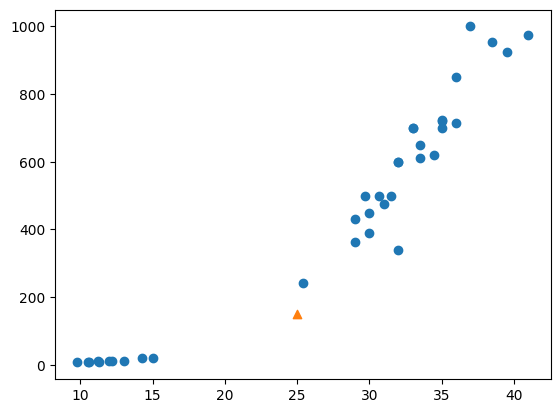

In [54]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel= ('length')
plt.ylabel= ('weight')
plt.show()

In [55]:
# kneighbors() 메소드 - 주어진 샘플에서 가장 가까운 이웃을 찾아준다.
# 이웃까지의 거리와 이웃 샘플의 인덱스를 반환
distances, indexes = kn.kneighbors([[25, 150]])

In [56]:
print(distances, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


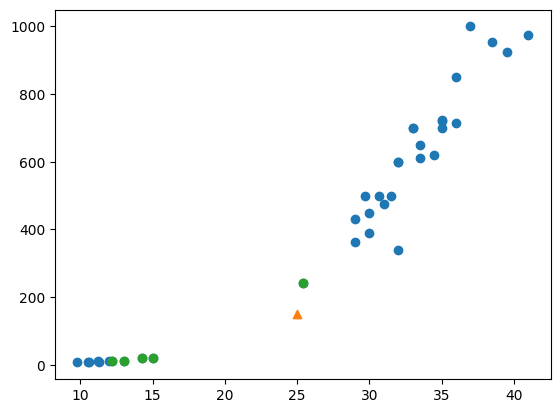

In [57]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1])
# [25,150]을 Knn 알고리즘이 가장 가까운 이웃들을 어떻게 선택했는지 시각적으로 확인 
plt.xlabel= ('length')
plt.ylabel= ('weight')
plt.show()

## 스케일링
- 데이터의 크기나 범위를 일정한 기준으로 조정하는 과정을 말함

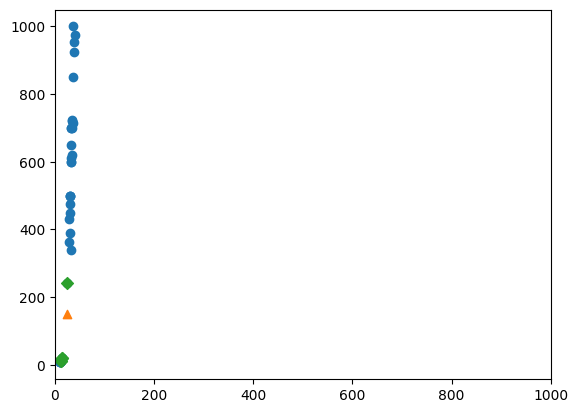

In [58]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # x축의 범위를 동일하게 0~1000으로 맞추기
plt.xlabel=('length')
plt.ylabel= ('weight')
plt.show()

In [59]:
# 평균과 표준편차를 이용하여 표준화하기
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [60]:
# 평균과 표준편차를 이용하여 표준화하기
train_scaled = (train_input - mean)/std


## 전처리 데이터로 모델 훈련

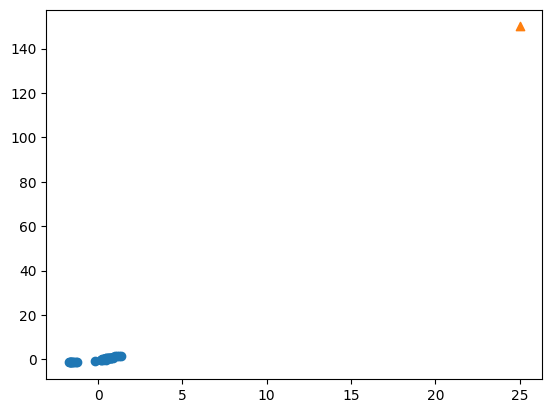

In [61]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
# 기존의 데이터는 스케일링은 하지 않아서 떨어져 있는 모습이 보이게 됨
# 따라서 기존의 데이터도 스케일링을 해야 함
plt.xlabel= ('length')
plt.ylabel= ('weight')
plt.show()

In [62]:
# 테스트 데이터의 스케일링, 동일한 기준 적용, [25, 150]
new = ( [25,150] - mean)/std


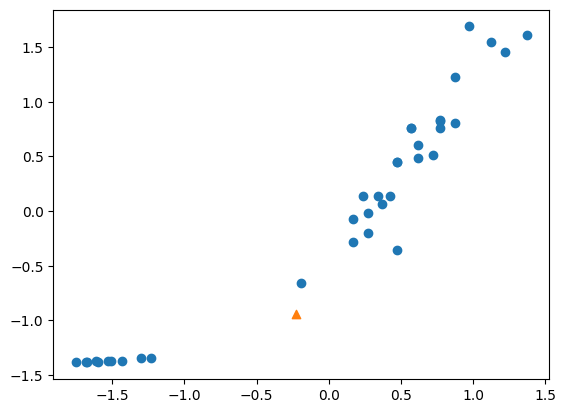

In [63]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
# plt.scatter(train_scaled[물고기의 길이], train_scaled[물고기의 무게])
plt.scatter(new[0], new[1], marker='^') # 새로운 데이터로 물고기의 길이, 무게
plt.xlabel= ('length')
plt.ylabel= ('weight')
plt.show()

In [64]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [65]:
# 테스트 데이터 스케일링
test_scaled = (test_input - mean)/std

In [66]:
# TODO: 모델 평가하기
kn.score(test_scaled,test_target)

1.0

In [71]:
# 새로운 데이터의 결과 예측하기
print(kn.predict([new]))

[1.]


In [68]:
# kneighbors()함수로 샘플의 KNN을 구한 다음 산점도 그리기
distances, indexes = kn.kneighbors([new])

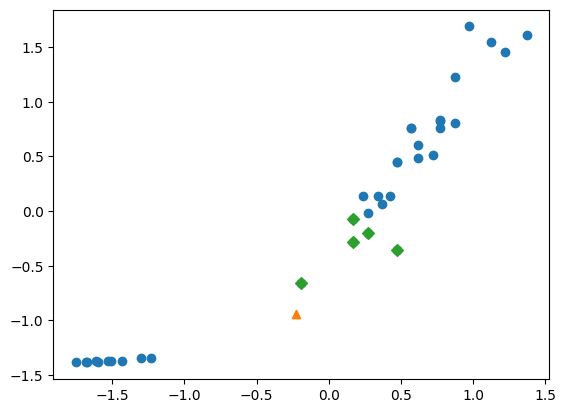

In [70]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel= ('length')
plt.ylabel= ('weight')
plt.show()